In [1]:
#!/usr/bin/env python

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta, expon, gamma
from numpy.random import randn
from numpy import mean, linspace, sum
from scipy.stats import norm

# Parameter Estimation For Exponential Distribution<br>
In this example, given data $\mathcal{D}$, we are going to estimate the parameters of an Exponential Distribution using<br>
- Bayesian Parameter Estimation<br>
- MAP<br>
- Note that the equation for an exponential distribution is<br>
$$ p(x) = \lambda e^{-\lambda x} $$<br>
$$ E[X] = \frac{1}{\lambda}$$<br>
- For Exponential distribution, the conjugate prior is the Gamma distribution where<br>
$$ p(\lambda) = \frac{1}{\Gamma(k) \theta^k} \lambda^{k-1} e^{-\lambda/\theta}.$$

### The likelihood, Prior, and the Posterior<br>
Given n samples, the likelihood function is<br>
$$ p(X = \mathcal{D}|\lambda) = \prod_i \; \lambda e^{- \lambda x_i} = \lambda^n e^{-\lambda \sum_i \; x_i}$$.<br>
Given the joint likelihood function and the conjugate prior, we know that $p(\lambda|X=\mathcal{D}) \propto  p(X=\mathcal{D}|\lambda)p(\lambda)$, therefore<br>
$$p(\lambda|X=\mathcal{D}) \propto \left( \lambda^n e^{-\lambda \sum_i \; x_i} \right) \left( \frac{1}{\Gamma(k) \theta^k} \lambda^{k-1} e^{-\lambda/\theta} \right).$$<br>
If we combine the terms together, we get<br>
$$p(\lambda|X=\mathcal{D}) \propto \frac{1}{\Gamma(k) \theta^k} \lambda^{k+n-1} e^{-\lambda (\sum_i x_i - \frac{1}{\theta})}$$<br>
Since $p(\lambda|X=\mathcal{D})$ is in terms of $\lambda$, the term $\frac{1}{\Gamma(k) \theta^k}$ at the front is just a constant, therefore<br>
$$p(\lambda|X=\mathcal{D}) = \eta \lambda^{k+n-1} e^{-\lambda (\sum_i x_i - \frac{1}{\theta})}$$<br>
- Pay special attention to the fact that we went from $\propto$ to = sign. <br>
- This is because we may not know the exact proportion of $\eta$, but we the posterior is equal to a constant multiple<br>
- Once we simplified the equation, we notice that the structure of the residual equation is identical to a gamma distribution if<br>
$$\hat{k} = k + n, \quad \quad \hat{\theta} = \frac{1}{\sum_i x_i - 1/\theta}$$<br>
Giving us the posterior distribution<br>
$$ p(\lambda|X=\theta) = \frac{1}{\Gamma(\hat{k}) \; \hat{\theta}^\hat{k}} \; \lambda^{\hat{k}-1} e^{-\lambda/\hat{\theta}}.$$

#### Assume data is exponential, we will synthetically generate the data here

In [3]:
n = 1000
μ = 3
X = expon.rvs(scale=μ, size=n)

#### Define the prior gamma distribution as

In [4]:
k = 2
θ = 2
ǩ = k + n
θˊ = 1/(sum(X) - 1/θ)

#### Mode is the MAP solution<br>
mode = $(k-1) \theta$<br>
mean = $k \theta$

In [5]:
MAP_solution = (ǩ - 1)*θˊ
BPE_solution = ǩ*θˊ

In [6]:
print('Theoretical Truth = %.4f'%(1/μ))
print('Best λ according to MAP = %.4f'%MAP_solution)
print('Best λ according to MLE = %.4f'%(1/mean(X)))
print('Best λ according to Bayesian Parameter Estimation = %.4f'%(BPE_solution))

Theoretical Truth = 0.3333
Best λ according to MAP = 0.3197
Best λ according to MLE = 0.3193
Best λ according to Bayesian Parameter Estimation = 0.3200


	### Plotting out the Prior and posterior<br>
	In this example, we are going to assume a Gamma Prior with k = 2

In [7]:
x = linspace(0.2,0.5, 200);
y = gamma.pdf(x, ǩ, loc=0, scale=θˊ);

In [8]:
plt.figure(figsize=(10,4))
plt.subplot(121);
plt.hist(X, density=True, bins=30);
plt.title('Histogram of X')

Text(0.5, 1.0, 'Histogram of X')

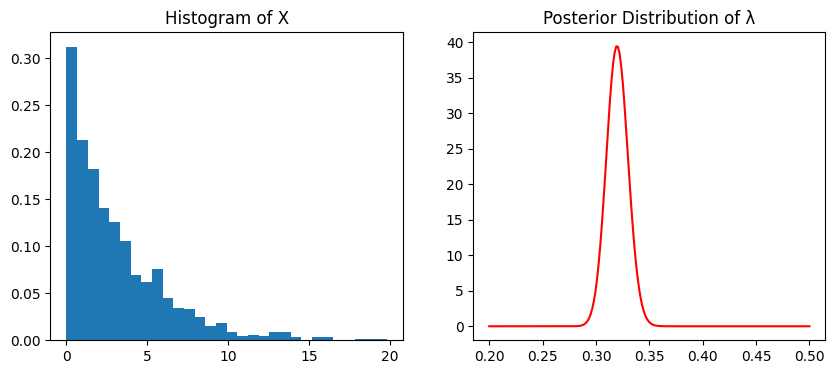

In [9]:
plt.subplot(122)
plt.plot(x,y,color='red')
plt.title('Posterior Distribution of λ')
plt.show()